### 1. Demographics data (dm.csv) [one record per subject]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Load demographics .csv
possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'dm.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))
# create data frame
demographics = pd.read_csv(file_path)
demographics

,STUDYID,DOMAIN,USUBJID,SUBJID,RFSTDTC,RFENDTC,DTHDTC,DTHFL,SITEID,INVID,...,ARM,ACTARMCD,ACTARM,COUNTRY,DMDTC,DMDY,DMENDY,DMDTC_TS,RFENDTC_TS,RFSTDTC_TS
0,MSOAC,DM,MSOAC/0649,649,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN
1,MSOAC,DM,MSOAC/2224,2224,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,SRB,NaN,NaN,NaN,NaN,NaN,NaN
2,MSOAC,DM,MSOAC/0576,576,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MSOAC,DM,MSOAC/4961,4961,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MSOAC,DM,MSOAC/5990,5990,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,MSOAC,DM,MSOAC/2501,2501,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,1.0,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461,MSOAC,DM,MSOAC/8672,8672,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,MSOAC,DM,MSOAC/5705,5705,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,MSOAC,DM,MSOAC/8255,8255,NaN,NaN,NaN,NaN,NaN,NaN,...,PLACEBO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
unique_count = demographics['USUBJID'].nunique()
print(f"Number of (unique) patients in this dataset: {unique_count}") #all patients in the dataset

Number of (unique) patients in this dataset: 2465


Check how many missing values we have per column

In [4]:
missing_percentage = (demographics.isnull().sum() / len(demographics)) * 100
missing_demographics = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
print(missing_demographics)

   Column Name  Missing Percentage
27  RFSTDTC_TS          100.000000
8       SITEID          100.000000
22       DMDTC          100.000000
23        DMDY          100.000000
24      DMENDY          100.000000
11     BRTHDTC          100.000000
9        INVID          100.000000
10      INVNAM          100.000000
7        DTHFL          100.000000
6       DTHDTC          100.000000
5      RFENDTC          100.000000
4      RFSTDTC          100.000000
25    DMDTC_TS          100.000000
26  RFENDTC_TS          100.000000
16      ETHNIC           90.750507
19    ACTARMCD           87.626775
20      ACTARM           87.626775
21     COUNTRY           56.267748
15        RACE           31.399594
12         AGE            3.367140
13        AGEU            3.367140
0      STUDYID            0.000000
18         ARM            0.000000
17       ARMCD            0.000000
1       DOMAIN            0.000000
3       SUBJID            0.000000
2      USUBJID            0.000000
14         SEX      

We will drop the columns with more than 85% missing values, namely:
- **STUDYID**: Study Identifier (irrelevant)
- **DOMAIN**: Domain Abbreviation (irrelevant)
- **SUBJID**: Subject Identifier for the Study (same as USUBJID)
- **RFSTDTC, RFENDTC, DTHDTC, DTHFL, SITEID, INVID, INVNAM, BRTHDTC, DMDTC, DMDY, DMENDY, DMDTC_TS, RFENDTC_TS, RFSTDTC_TS** (all missing and not even mentioned in the dictionary)
- **AGEU**: Age Units (NA when AGE missing or YEARS - irrelevant)
- **ACTARMCD**: Actual Arm Code (only NA or 1 - seems irrelevant and same info as ACTARM)
- **ACTARM**: Description of Actual Arm (only NA or PLACEBO - seems irrelevant)
- **ARMCD**: Planned Arm Code (only 1 - irrelevant and same info as ARM)
- **ARM**: Description of Planned Arm (only PLACEBO - irrelevant)
- **ETHNIC**: Ethnicity (too many missing values and *already included in RACE*) - HISPANIC OR LATINO or NOT HISPANIC OR LATINO

In [5]:
columns_to_drop = ['STUDYID','DOMAIN','SUBJID','RFSTDTC','RFENDTC','DTHDTC','DTHFL','SITEID','INVID','INVNAM','BRTHDTC','AGEU','ETHNIC','ARMCD','ARM','ACTARMCD','ACTARM','DMDTC','DMDY','DMENDY','DMDTC_TS','RFENDTC_TS','RFSTDTC_TS']
demographics = demographics.drop(columns_to_drop, axis=1)
demographics

,USUBJID,AGE,SEX,RACE,COUNTRY
0,MSOAC/0649,NaN,F,WHITE,USA
1,MSOAC/2224,38.0,F,WHITE,SRB
2,MSOAC/0576,50.0,F,WHITE,NaN
3,MSOAC/4961,44.0,F,WHITE,NaN
4,MSOAC/5990,52.0,F,WHITE,NaN
...,...,...,...,...,...
2460,MSOAC/2501,46.0,F,WHITE,NaN
2461,MSOAC/8672,43.0,F,NaN,NaN
2462,MSOAC/5705,30.0,M,NaN,NaN
2463,MSOAC/8255,42.0,M,NaN,NaN


- Descriptive statistics for continuous variables (in this case, just age)

In [6]:
continuous_columns = ['AGE']

descriptive_continuous = {
    'Count': demographics[continuous_columns].count(), #cases that are not missing
    'Missing Cases': demographics[continuous_columns].isna().sum(),
    'Mean': demographics[continuous_columns].mean(),
    'Standard Deviation': demographics[continuous_columns].std()
}

cont_demographics = pd.DataFrame(descriptive_continuous)

print(cont_demographics)

     Count  Missing Cases       Mean  Standard Deviation
AGE   2382             83  41.766583           10.413545


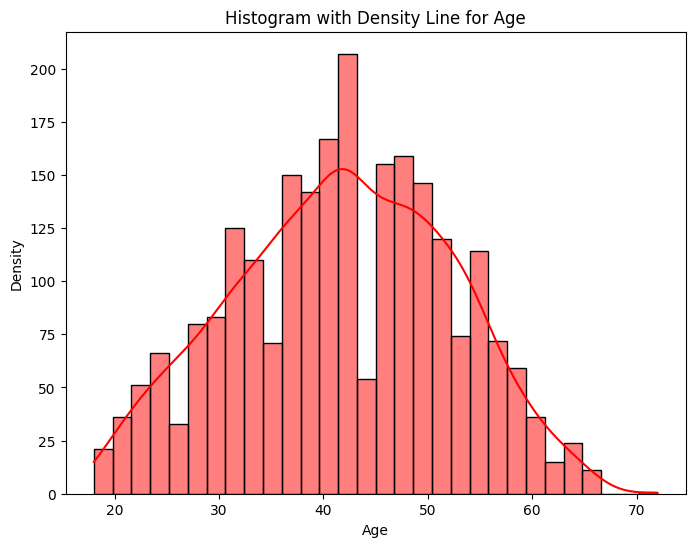

In [7]:
age = demographics['AGE'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(age, kde=True, color='red', bins=30)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram with Density Line for Age')
plt.show() # more or less normaly distributed

In [8]:
summary_stats = age.describe()
summary_stats

count    2382.000000
mean       41.766583
std        10.413545
min        18.000000
25%        34.000000
50%        42.000000
75%        50.000000
max        72.000000
Name: AGE, dtype: float64

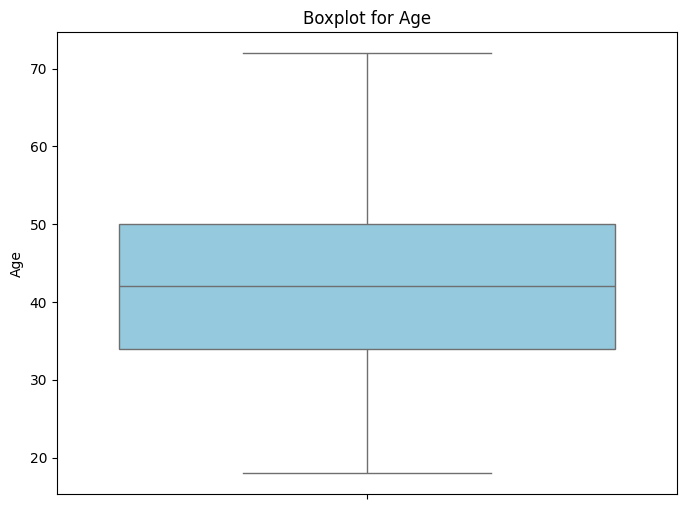

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=age, color='skyblue')
plt.ylabel('Age')
plt.title('Boxplot for Age')
plt.show()

- Descriptive statistics for categorical variables (in this case, gender, race and country)

In [10]:
categorical_columns = ['SEX', 'RACE','COUNTRY']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': demographics[col].count(),
        'Missing Cases': demographics[col].isna().sum(),
        'Unique Values': demographics[col].nunique(),
        'Mode': demographics[col].mode().values[0],
        'Mode Frequency': demographics[col].value_counts().max()
    }

cat_demographics = pd.DataFrame(descriptive_categorical).T
print(cat_demographics)

        Count Missing Cases Unique Values   Mode Mode Frequency
SEX      2465             0             2      F           1658
RACE     1691           774             7  WHITE           1534
COUNTRY  1078          1387            35    USA            249


- Number of observations for each RACE category

In [11]:
race_counts_demographics = demographics['RACE'].value_counts().reset_index()
race_counts_demographics.columns = ['Race', 'Count']
total_count = race_counts_demographics['Count'].sum()
race_counts_demographics['Percentage'] = (race_counts_demographics['Count'] / total_count) * 100

print(race_counts_demographics)

                               Race  Count  Percentage
0                             WHITE   1534   90.715553
1                             ASIAN     64    3.784743
2                             OTHER     41    2.424601
3         BLACK OR AFRICAN AMERICAN     39    2.306328
4                          HISPANIC     10    0.591366
5  AMERICAN INDIAN OR ALASKA NATIVE      2    0.118273
6                HISPANIC OR LATINO      1    0.059137


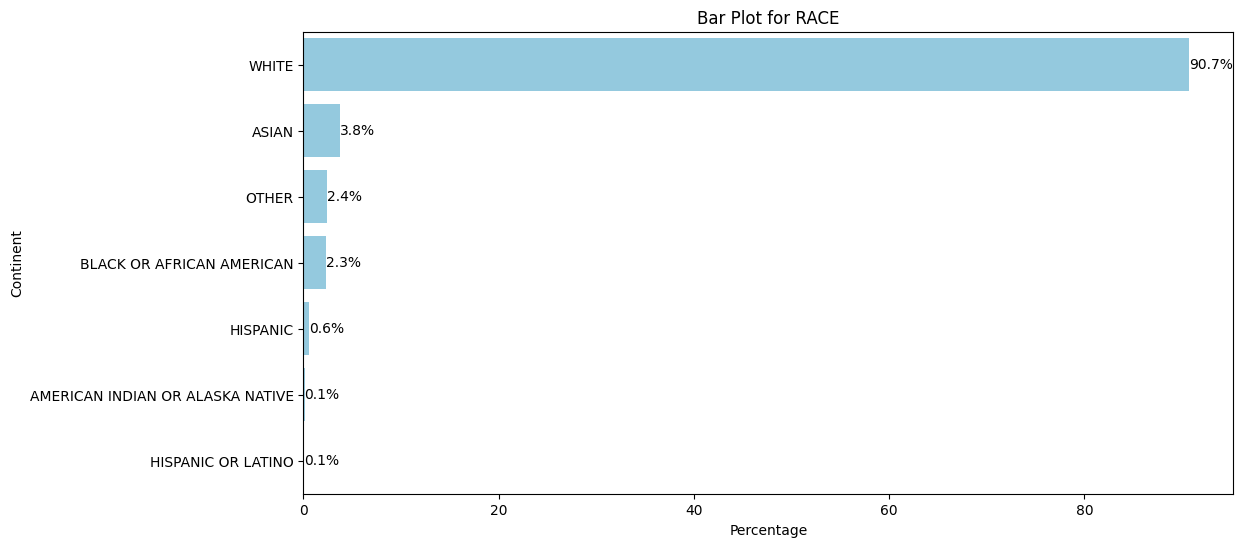

In [24]:
# Obtain Bar Plot for RACE
demographics1 = demographics.copy()

demographics1.dropna(subset=['RACE'], inplace=True)
category_counts = demographics1['RACE'].value_counts(dropna=False)

# Calculate percentages
total_values = category_counts.sum()
category_percentages = (category_counts / total_values) * 100

category_df = pd.DataFrame({'RACE': category_percentages.index, 'Percentage': category_percentages.values})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='RACE', data=category_df, color='skyblue')

# Add percentage labels
for index, value in enumerate(category_df['Percentage']):
    plt.text(value, index, f'{value:.1f}%', va='center')

plt.xlabel('Percentage')
plt.ylabel('Continent')
plt.title('Bar Plot for RACE')

#Save fig
plt.savefig('../assets/demographics_race.png', bbox_inches='tight')

plt.show()
plt.close()

In [16]:
#race = demographics['RACE'].dropna()

#colors = sns.color_palette('pastel')

#plt.figure(figsize=(8, 6))
#race.value_counts().plot(kind='bar', color=colors)
#plt.xlabel('Race')
#plt.ylabel('Count')
#plt.title('Bar Chart for Race')
#plt.show()

- Number of observations for each SEX category

In [130]:
sex_counts_demographics = demographics['SEX'].value_counts().reset_index()
sex_counts_demographics.columns = ['Gender', 'Count']
total_count = sex_counts_demographics['Count'].sum()
sex_counts_demographics['Percentage'] = (sex_counts_demographics['Count'] / total_count) * 100

print(sex_counts_demographics)

  Gender  Count  Percentage
0      F   1658   67.261663
1      M    807   32.738337


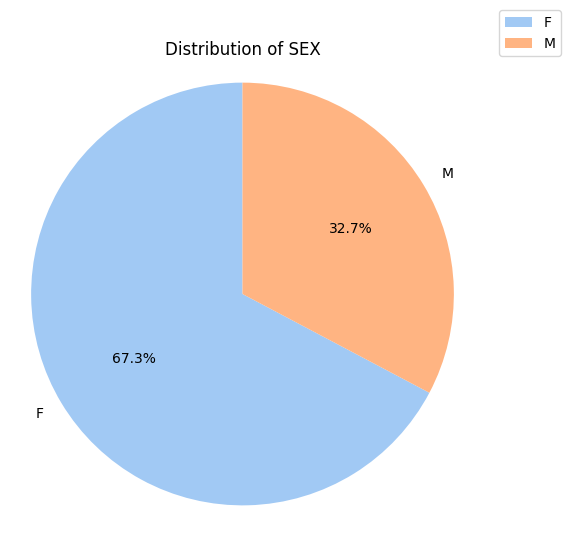

In [20]:
# Pie chart - dropped NA for now
category_counts = demographics['SEX'].dropna().value_counts()

# Get unique categories
categories = category_counts.index

# Define colors using seaborn color palette
colors = sns.color_palette('pastel')

# Plot
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90, colors=colors)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.title('Distribution of SEX')

#Save fig
plt.savefig('../assets/demographics_gender.png', bbox_inches='tight')

plt.show()
plt.close()

- Number of observations for each COUNTRY category

In [132]:
country_counts_demographics = demographics['COUNTRY'].value_counts().reset_index()
country_counts_demographics.columns = ['Country', 'Count']
total_count = country_counts_demographics['Count'].sum()
country_counts_demographics['Percentage'] = (country_counts_demographics['Count'] / total_count) * 100

print(country_counts_demographics)

   Country  Count  Percentage
0      USA    249   23.098330
1      POL    177   16.419295
2      CAN     73    6.771800
3      UKR     63    5.844156
4      CZE     63    5.844156
5      IND     56    5.194805
6      RUS     48    4.452690
7      SRB     46    4.267161
8      DEU     44    4.081633
9      GBR     37    3.432282
10     NLD     26    2.411874
11     BGR     21    1.948052
12     HUN     19    1.762523
13     ROU     16    1.484230
14     GRC     14    1.298701
15     FRA     13    1.205937
16     NZL     10    0.927644
17     BEL     10    0.927644
18     SWE      9    0.834879
19     MEX      9    0.834879
20     EST      8    0.742115
21     ESP      7    0.649351
22     PER      7    0.649351
23     GEO      7    0.649351
24     AUS      7    0.649351
25     ISR      6    0.556586
26     CHE      6    0.556586
27     HRV      5    0.463822
28     TUR      5    0.463822
29     COL      5    0.463822
30     LVA      3    0.278293
31     FIN      3    0.278293
32     IRL

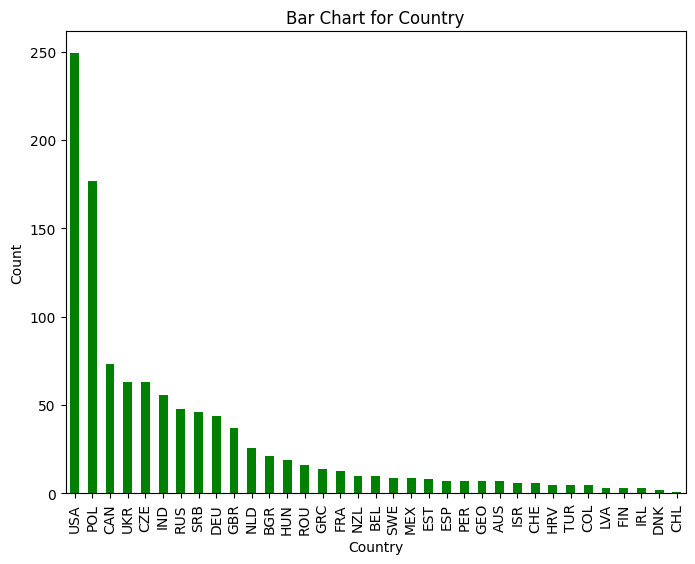

In [133]:
country = demographics['COUNTRY'].dropna()

plt.figure(figsize=(8, 6))
country.value_counts().plot(kind='bar', color='green')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Bar Chart for Country')
plt.show()

#### Variables transformation


In [134]:
demographics['RACE'] = demographics['RACE'].apply(lambda x: 'WHITE' if x == 'WHITE' else 'NON-WHITE' if pd.notnull(x) else np.nan)


race_counts_demographics = demographics['RACE'].value_counts().reset_index()
race_counts_demographics.columns = ['Race', 'Count']
total_count = race_counts_demographics['Count'].sum()
race_counts_demographics['Percentage'] = (race_counts_demographics['Count'] / total_count) * 100

print(race_counts_demographics)

        Race  Count  Percentage
0      WHITE   1534   90.715553
1  NON-WHITE    157    9.284447


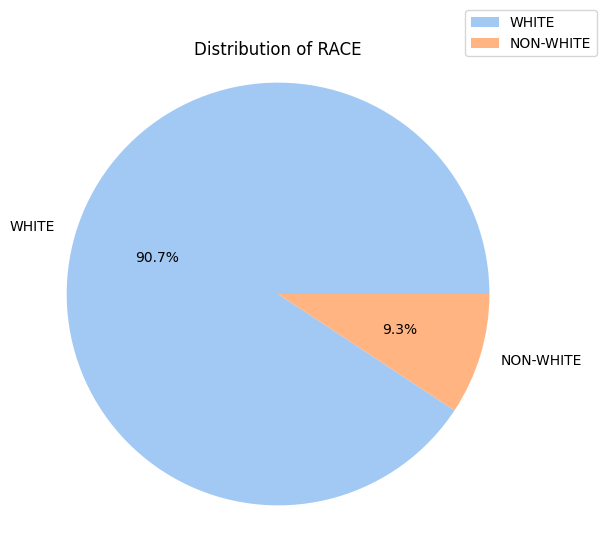

In [135]:
# Pie chart - dropped NA for now

# Count values
category_counts = demographics['RACE'].dropna().value_counts()

# Get unique categories
categories = category_counts.index

# Define colors using seaborn color palette
colors = sns.color_palette('pastel')

# Plot
plt.figure(figsize=(6, 6))  # Adjust the figsize here
plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=0, colors=colors)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.title('Distribution of RACE')
plt.show()

In [136]:
# Map each country to the right continent
continent_mapping = {
    'USA': 'North America',
    'POL': 'Europe',
    'CAN': 'North America',
    'UKR': 'Europe',
    'CZE': 'Europe',
    'IND': 'Asia',
    'RUS': 'Eurasia',
    'SRB': 'Europe',
    'DEU': 'Europe',
    'GBR': 'Europe',
    'NLD': 'Europe',
    'BGR': 'Europe',
    'HUN': 'Europe',
    'ROU': 'Europe',
    'GRC': 'Europe',
    'FRA': 'Europe',
    'NZL': 'Oceania',
    'BEL': 'Europe',
    'SWE': 'Europe',
    'MEX': 'North America',
    'EST': 'Europe',
    'ESP': 'Europe',
    'PER': 'South America',
    'GEO': 'Asia',
    'AUS': 'Oceania',
    'ISR': 'Asia',
    'CHE': 'Europe',
    'HRV': 'Europe',
    'TUR': 'Eurasia',
    'COL': 'South America',
    'LVA': 'Europe',
    'FIN': 'Europe',
    'IRL': 'Europe',
    'DNK': 'Europe',
    'CHL': 'South America'
}

demographics['CONTINENT'] = demographics['COUNTRY'].map(continent_mapping)
demographics['CONTINENT'] = demographics['CONTINENT'].str.upper()

demographics = demographics.drop('COUNTRY', axis=1)

In [137]:
continent_counts_demographics = demographics['CONTINENT'].value_counts().reset_index()
continent_counts_demographics.columns = ['Continent', 'Count']
total_count = continent_counts_demographics['Count'].sum()
continent_counts_demographics['Percentage'] = (continent_counts_demographics['Count'] / total_count) * 100

print(continent_counts_demographics)

       Continent  Count  Percentage
0         EUROPE    595   55.194805
1  NORTH AMERICA    331   30.705009
2           ASIA     69    6.400742
3        EURASIA     53    4.916512
4        OCEANIA     17    1.576994
5  SOUTH AMERICA     13    1.205937


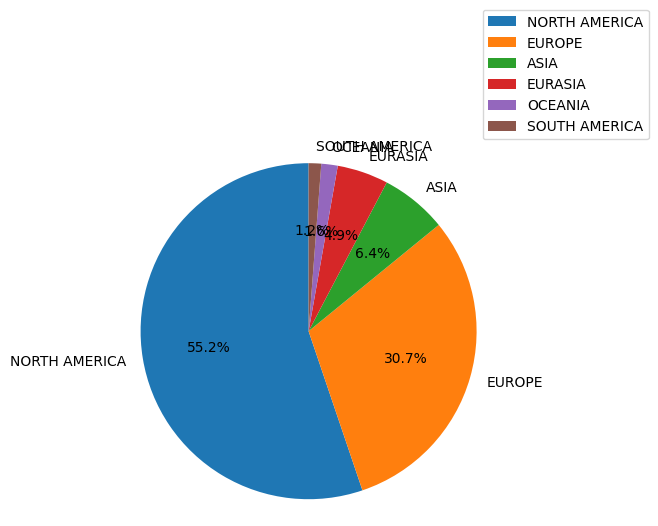

In [138]:
# Pie chart - dropped NA for now
categories = demographics['CONTINENT'].dropna().unique()
category_counts = demographics['CONTINENT'].dropna().value_counts()

plt.pie(category_counts, labels=categories, autopct='%1.1f%%', startangle=90)
plt.legend(labels=categories, loc='lower right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')
plt.show()

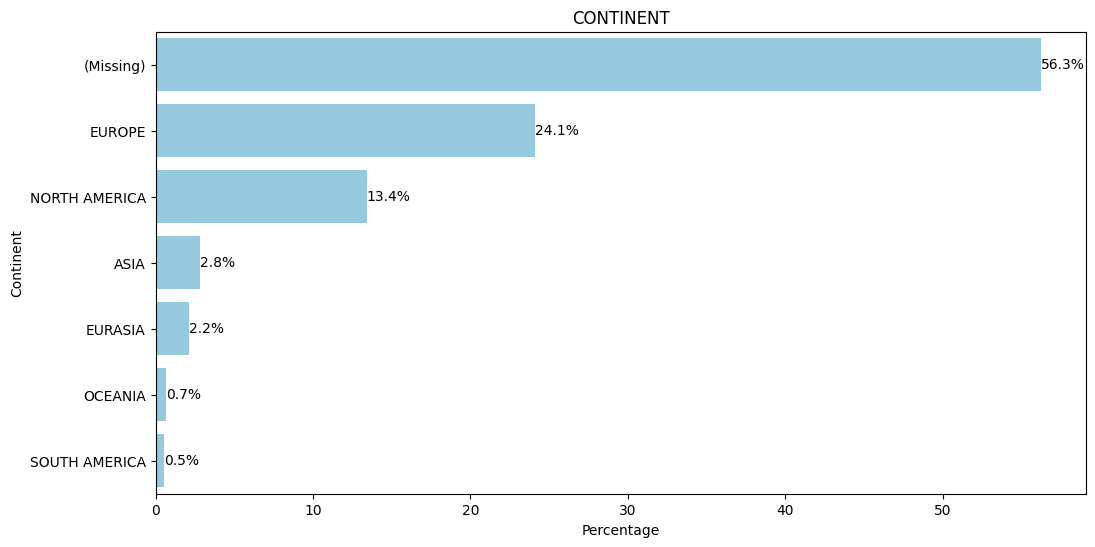

In [139]:
demographics2 = demographics.copy()

# Fill missing values with a label
demographics2['CONTINENT'] = demographics2['CONTINENT'].fillna('(Missing)')

# Count values
category_counts = demographics2['CONTINENT'].value_counts()

# Calculate percentages
total_values = category_counts.sum()
category_percentages = (category_counts / total_values) * 100

# Convert back to DataFrame for seaborn
category_df = pd.DataFrame({'CONTINENT': category_percentages.index, 'Percentage': category_percentages.values})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='CONTINENT', data=category_df, color='skyblue')

# Add percentage labels
for index, value in enumerate(category_df['Percentage']):
    plt.text(value, index, f'{value:.1f}%', va='center')

plt.xlabel('Percentage')
plt.ylabel('Continent')
plt.title('CONTINENT')
plt.show()

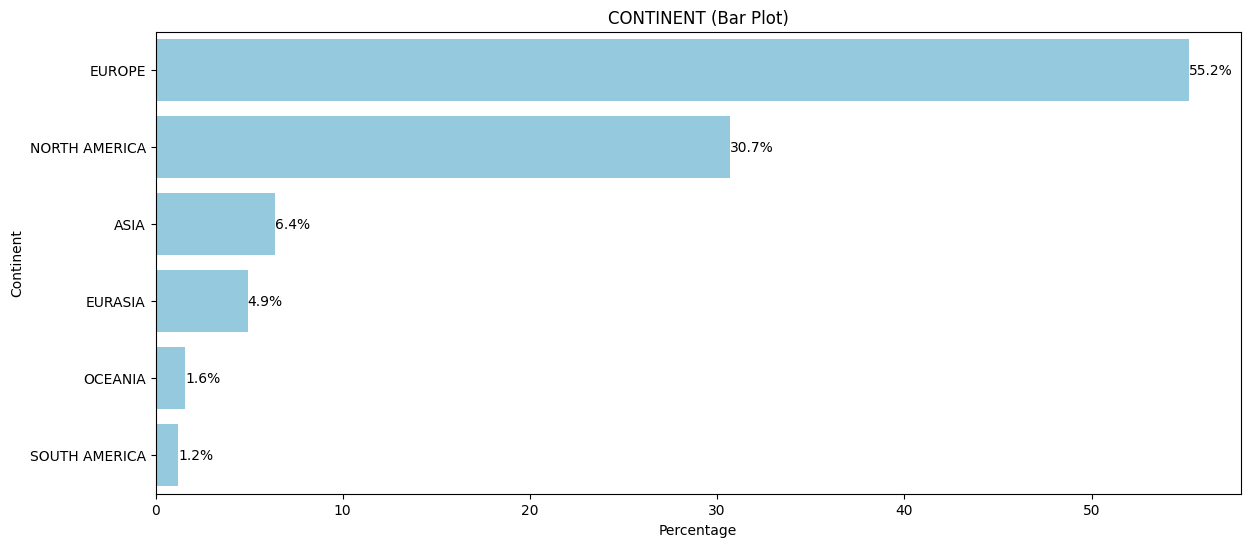

In [140]:
# now without considering the NA
demographics3 = demographics.copy()

# Drop NA values
demographics3.dropna(subset=['CONTINENT'], inplace=True)

# Count values
category_counts = demographics3['CONTINENT'].value_counts(dropna=False)

# Calculate percentages
total_values = category_counts.sum()
category_percentages = (category_counts / total_values) * 100

# Convert back to DataFrame for seaborn
category_df = pd.DataFrame({'CONTINENT': category_percentages.index, 'Percentage': category_percentages.values})

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Percentage', y='CONTINENT', data=category_df, color='skyblue')

# Add percentage labels
for index, value in enumerate(category_df['Percentage']):
    plt.text(value, index, f'{value:.1f}%', va='center')

plt.xlabel('Percentage')
plt.ylabel('Continent')
plt.title('CONTINENT (Bar Plot)')
plt.show()

In [141]:
#country = demographics['CONTINENT'].dropna()

#plt.figure(figsize=(8, 6))
#country.value_counts().plot(kind='bar', color='green')
#plt.xlabel('Continent')
#plt.ylabel('Count')
#plt.title('Bar Chart for Country')
#plt.show()

#### Final Dataset


In [142]:
demographics

,USUBJID,AGE,SEX,RACE,CONTINENT
0,MSOAC/0649,NaN,F,WHITE,NORTH AMERICA
1,MSOAC/2224,38.0,F,WHITE,EUROPE
2,MSOAC/0576,50.0,F,WHITE,NaN
3,MSOAC/4961,44.0,F,WHITE,NaN
4,MSOAC/5990,52.0,F,WHITE,NaN
...,...,...,...,...,...
2460,MSOAC/2501,46.0,F,WHITE,NaN
2461,MSOAC/8672,43.0,F,NaN,NaN
2462,MSOAC/5705,30.0,M,NaN,NaN
2463,MSOAC/8255,42.0,M,NaN,NaN


In [143]:
# Obtain missing percentages of the final dataset
missing_percentage = (demographics.isnull().sum() / len(demographics)) * 100
missing_demographics = pd.DataFrame({'Column Name': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
missing_demographics = missing_demographics.sort_values(by='Missing Percentage', ascending=False)
print(missing_demographics)

  Column Name  Missing Percentage
4   CONTINENT           56.267748
3        RACE           31.399594
1         AGE            3.367140
0     USUBJID            0.000000
2         SEX            0.000000


In [144]:
folder_name = 'new_data'

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/Thesis_Sofia_Lennert',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert'
]

for path in possible_paths:
    if os.path.exists(path):
        folder_path = os.path.join(path, folder_name)
        if not os.path.exists(folder_path):  # Check if the folder doesn't exist
            try:
                os.makedirs(folder_path)
                break  # Exit the loop if folder creation is successful
            except PermissionError:
                print(f"Warning: Unable to create '{folder_name}' folder in {path}.")
        else:
            print(f"Folder '{folder_name}' already exists in {path}.")
else:
    print("Unable to create the folder in any of the specified paths.")

# Specify the path for the CSV file
csv_file_path = os.path.join(folder_path, 'DM_agg.csv')

# Save the DataFrame to CSV
demographics.to_csv(csv_file_path, index=False)

Folder 'new_data' already exists in C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/Thesis_Sofia_Lennert.
Unable to create the folder in any of the specified paths.
